In [14]:
import numpy as np
import scipy.stats as stats

In [18]:
def anova(a, b, c):
  total_mean = np.mean(a + b + c)

  sst = 0

  for i in a + b + c:
    sst += (i - total_mean) ** 2

  ssb = 0

  ssb += len(a) * ((np.mean(a) - total_mean) ** 2)
  ssb += len(b) * ((np.mean(b) - total_mean) ** 2)
  ssb += len(c) * ((np.mean(c) - total_mean) ** 2)

  df_ssb = 2

  ssw = sst - ssb

  df_ssw = len(a) + len(b) + len(c) - 3


  f_val = (ssb / df_ssb) / (ssw / df_ssw)

  return f_val, df_ssw, df_ssb

In [12]:
a = [3, 1, 2]
b = [5, 3, 4]
c = [7, 6, 5]

In [19]:
f, sw, sb = anova(a, b, c)  # f value output

In [24]:
print(stats.f.sf(f, sb, sw))

0.008000000000000002


In [25]:
# it's less than 0.05.
# That's good!
# It means at least means of 2 of our groups are significantly different

In [26]:
import matplotlib.pyplot as plt

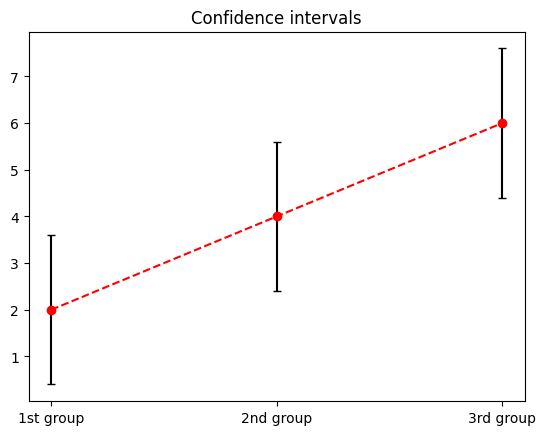

In [31]:
def build_confidence_intervals(a, b, c):
  up = [1.96 * np.std(a), 1.96 * np.std(b), 1.96 * np.std(c)]
  down = [1.96 * np.std(a), 1.96 * np.std(b), 1.96 * np.std(c)]
  M = [np.mean(a), np.mean(b), np.mean(c)]

  fig = plt.figure()
  x = ['1st group', '2nd group', '3rd group']
  y = M
  yerr = [up, down]

  plt.title('Confidence intervals')
  plt.errorbar(x, y, yerr=yerr, capsize=3, fmt="r--o", ecolor = "black")
  plt.show()

build_confidence_intervals(a, b, c);